In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('data.csv')
print(df.shape)
#viewing all 16 columns and first 80 rows
pd.set_option("display.max_columns",16)
pd.set_option("display.max_rows", 80)
df

(11914, 16)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [3]:
#Columns
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [4]:
#Checking for null values
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [5]:
#Filling HP values wit mean of df["Engine HP"] and droppping rest of tHe NAN values from oter columns
hp_mean=df["Engine HP"].mean()
df["Engine HP"].fillna(hp_mean,inplace=True)
df.dropna(inplace=True)

In [6]:
df.shape

(8136, 16)

Visualization

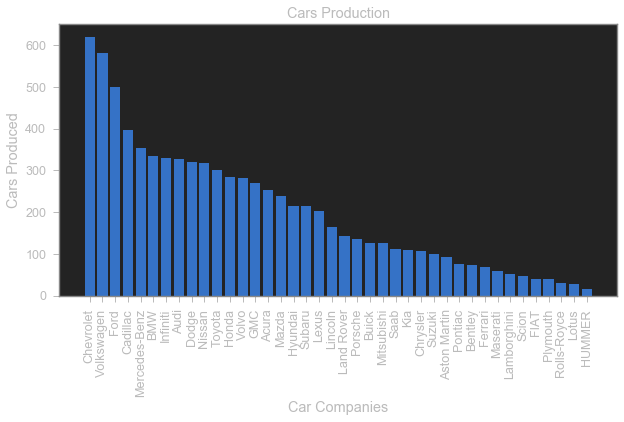

In [159]:
#Which company produced most cars?
most_produce=pd.DataFrame(df["Make"].value_counts())
fig=plt.figure(figsize=(10,5))
#plotting top 40 companies
plt.bar(most_produce.index[0:40],most_produce["Make"][0:40])
plt.xticks(rotation="vertical")
plt.xlabel("Car Companies")
plt.ylabel("Cars Produced")
plt.title("Cars Production")
plt.show()

In [160]:
df["Year"].unique()

array([2011, 2012, 2013, 1992, 1993, 1994, 2017, 1991, 2016, 1990, 2015,
       1996, 1997, 1998, 2014, 1999, 2002, 2003, 2004, 1995, 2007, 2008,
       2009, 2001, 2010, 2005, 2006, 2000], dtype=int64)

In [8]:
#Finding correlation and plotting heatmaps
corr=df.corr()
corr

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.243168,-0.051945,0.184189,0.201458,0.159020,0.118685,0.133382
Engine HP,0.243168,1.000000,0.798708,-0.196405,-0.413557,-0.407525,0.037455,0.656338
Engine Cylinders,-0.051945,0.798708,1.000000,-0.180921,-0.606470,-0.588549,0.009289,0.577260
Number of Doors,0.184189,-0.196405,-0.180921,1.000000,0.102998,0.125885,-0.038669,-0.184122
highway MPG,0.201458,-0.413557,-0.606470,0.102998,1.000000,0.867124,0.038986,-0.219708
city mpg,0.159020,-0.407525,-0.588549,0.125885,0.867124,1.000000,0.042955,-0.208529
Popularity,0.118685,0.037455,0.009289,-0.038669,0.038986,0.042955,1.000000,-0.053139
MSRP,0.133382,0.656338,0.577260,-0.184122,-0.219708,-0.208529,-0.053139,1.000000


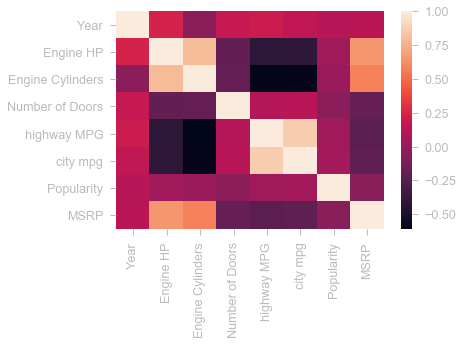

In [9]:
#eatmap
sns.heatmap(corr)

Text(0.5, 1.0, 'MSRP vs Engine HP')

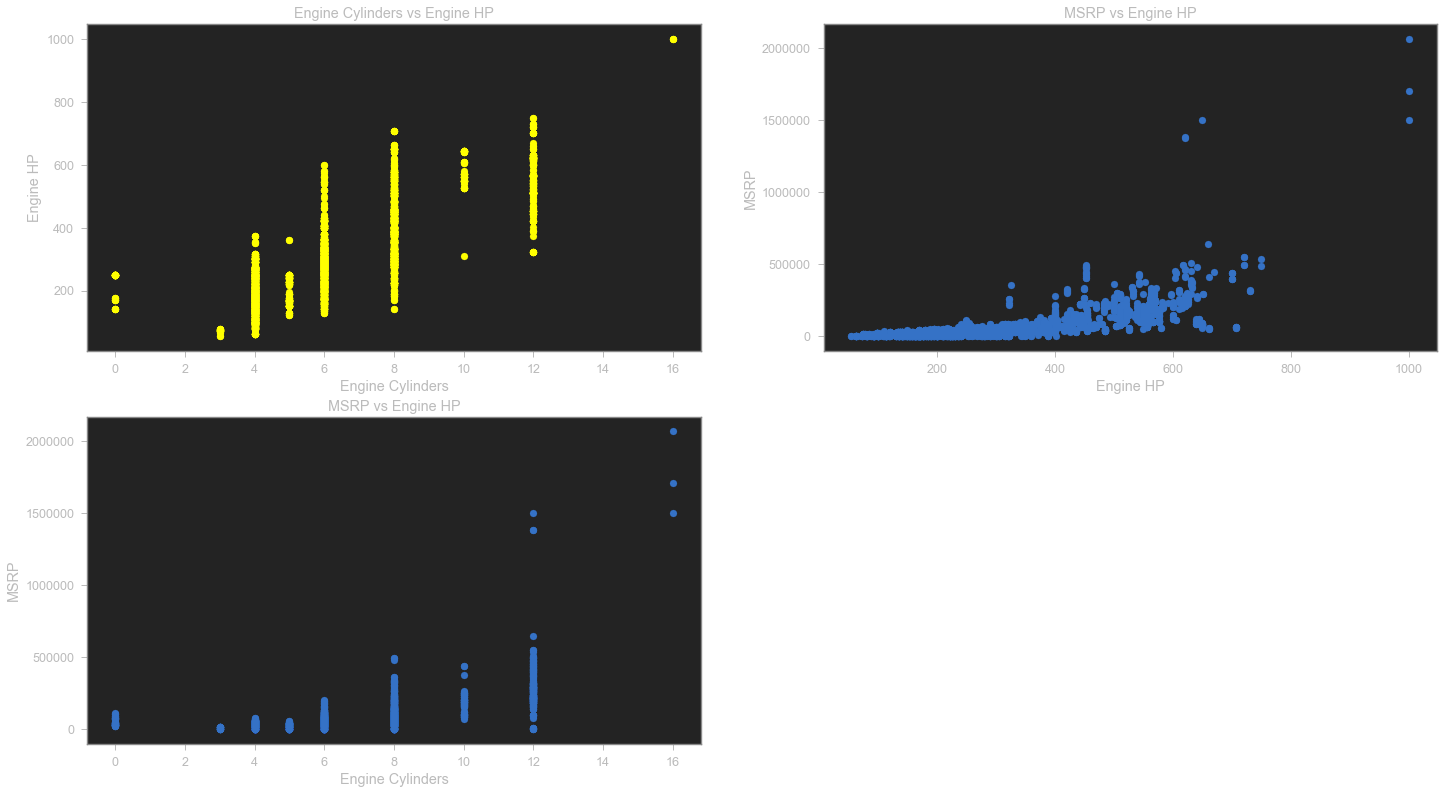

In [10]:
#Plotting a scatter plot between {horsepower and Engine Cylinders} , 
# {MSRP and Engine HP} and {MSRP and Engine Cylinders}
from matplotlib import gridspec
fig=plt.figure(figsize=(10,10))
plt.subplots_adjust(right=2,top=2,bottom=1)
gs=gridspec.GridSpec(2,2)
ax1=fig.add_subplot(gs[0])
ax2=fig.add_subplot(gs[1])
ax3=fig.add_subplot(gs[2])
#horsepower and Engine Cylinders
ax1.scatter(df["Engine Cylinders"],df["Engine HP"],color='yellow')
ax1.set_xlabel("Engine Cylinders")
ax1.set_ylabel("Engine HP")
ax1.set_title("Engine Cylinders vs Engine HP")
#MSRP and Engine HP
ax2.scatter(df["Engine HP"],df["MSRP"])
ax2.set_xlabel("Engine HP")
ax2.set_ylabel("MSRP")
ax2.set_title("MSRP vs Engine HP")
#MSRP and Engine Cylinders
ax3.scatter(df["Engine Cylinders"],df["MSRP"])
ax3.set_xlabel("Engine Cylinders")
ax3.set_ylabel("MSRP")
ax3.set_title("MSRP vs Engine HP")


Which company produced which transmission Type ?

In [11]:
trans_comp = df.groupby("Transmission Type")["Make"].value_counts()
trans_comp=pd.DataFrame(trans_comp)
trans_comp.rename(columns={"Make":"Numbers"},inplace=True)

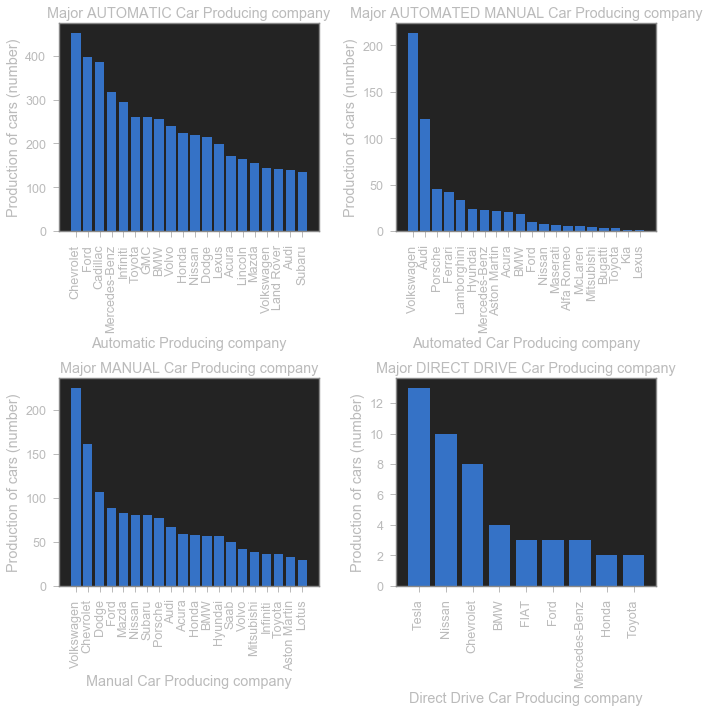

In [12]:
#plotting transmission type  for eac company
fig=plt.figure(figsize=(10,10))
gs=gridspec.GridSpec(2,2)
ax1=fig.add_subplot(gs[0])
ax2=fig.add_subplot(gs[1])
ax3=fig.add_subplot(gs[2])
ax4=fig.add_subplot(gs[3])

#Automatic Transmission type production
auto_man=trans_comp.loc["AUTOMATIC"]
ax1.bar(auto_man.index[0:20],auto_man["Numbers"][0:20])
ax1.set_xticklabels(auto_man.index,rotation='vertical')
ax1.set_xlabel("Automatic Producing company")
ax1.set_ylabel("Production of cars (number)")
ax1.set_title("Major AUTOMATIC Car Producing company")

#AUTOMATED MANUAL Transmission type production
auto_man=trans_comp.loc["AUTOMATED_MANUAL"]
ax2.bar(auto_man.index[0:20],auto_man["Numbers"][0:20])
ax2.set_xticklabels(auto_man.index,rotation='vertical')
ax2.set_xlabel("Automated Car Producing company")
ax2.set_ylabel("Production of cars (number)")
ax2.set_title("Major AUTOMATED MANUAL Car Producing company")

#MANUAL Transmission type production
auto_man=trans_comp.loc["MANUAL"]
ax3.bar(auto_man.index[0:20],auto_man["Numbers"][0:20])
ax3.set_xticklabels(auto_man.index,rotation='vertical')
ax3.set_xlabel("Manual Car Producing company")
ax3.set_ylabel("Production of cars (number)")
ax3.set_title("Major MANUAL Car Producing company")

#DIRECT_DRIVE Transmission type production
auto_man=trans_comp.loc["DIRECT_DRIVE"]
ax4.bar(auto_man.index[0:20],auto_man["Numbers"][0:20])
ax4.set_xticklabels(auto_man.index,rotation='vertical')
ax4.set_xlabel("Direct Drive Car Producing company")
ax4.set_ylabel("Production of cars (number)")
ax4.set_title("Major DIRECT DRIVE Car Producing company")

plt.tight_layout()
plt.show()

Engine Fuel Type 

In [14]:
#Changing names
common_name={"premium unleaded (required)":"unleaded",
            "regular unleaded":"unleaded",
            "premium unleaded (recommended)":"unleaded",
            "flex-fuel (premium unleaded recommended/E85)" : "flex fuel",
            "flex-fuel (premium unleaded required/E85)" : "flex fuel",
            "flex-fuel (unleaded/natural gas)":"flex fuel",
            "flex-fuel (unleaded/E85)":"flex fuel"}
df["Engine Fuel Type"].replace(common_name,inplace=True)

In [15]:
df["Engine Fuel Type"].unique()

array(['unleaded', 'flex fuel', 'diesel', 'electric'], dtype=object)

In [16]:
engine_type = df["Engine Fuel Type"].value_counts()
engine_type=pd.DataFrame(engine_type)

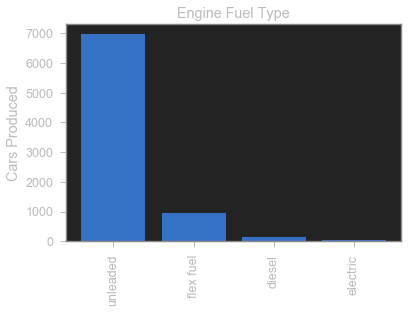

In [17]:
plt.bar(engine_type.index[0:4],engine_type["Engine Fuel Type"][0:4])
plt.xticks(rotation='vertical')
plt.ylabel("Cars Produced")
plt.title("Engine Fuel Type")
plt.show()

But how as Engine Fuel type changed in recent years (say from 2014-2017) ?

In [25]:
fuel_type_before2014 = df[df["Year"] < 2014]["Engine Fuel Type"].value_counts()

In [26]:
fuel_type_before2014=pd.DataFrame(fuel_type_before2014)
fuel_type_before2014

,Engine Fuel Type
unleaded,2672
flex fuel,266
diesel,28
electric,2


In [27]:
fuel_type_after2014 = df[((df["Year"] == 2017) | (df["Year"] ==2016) | (df["Year"] == 2015) 
                         | (df["Year"] == 2014))]["Engine Fuel Type"].value_counts()

In [28]:
fuel_type_after2014=pd.DataFrame(fuel_type_after2014)
fuel_type_after2014

,Engine Fuel Type
unleaded,4297
flex fuel,701
diesel,126
electric,44


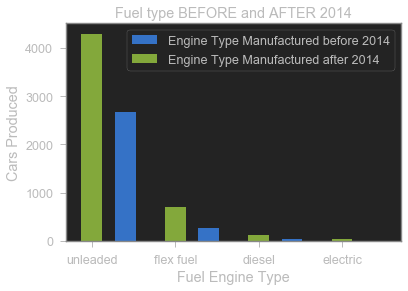

In [85]:
#plotting
x_indexes=np.arange(len(fuel_type_before2014.index))
width=0.25
plt.bar(x_indexes+0.4,fuel_type_before2014["Engine Fuel Type"],width=width,
        label="Engine Type Manufactured before 2014")
plt.bar(x_indexes,fuel_type_after2014["Engine Fuel Type"],width=width,
        label="Engine Type Manufactured after 2014")
plt.xticks(ticks=x_indexes,labels=fuel_type_before2014.index)
plt.xlabel("Fuel Engine Type")
plt.ylabel("Cars Produced")
plt.title("Fuel type BEFORE and AFTER 2014")
plt.legend()

In [150]:
#Popularity and MAKE
pop=df.groupby("Make")["Popularity"].sum()
pop=pop.sort_values(ascending=False)
pop=pd.DataFrame(pop)

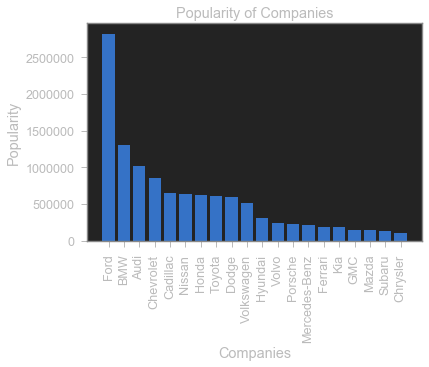

In [156]:
plt.bar(pop.index[0:20],pop["Popularity"][0:20])
plt.xticks(rotation='vertical')
plt.xlabel("Companies")
plt.ylabel("Popularity")
plt.title("Popularity of Companies")
plt.show()